In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")

In [2]:
lake_data = pd.read_csv(r'C:\Users\mwendwa.kiko\Documents\Personal Kiko\UofT\Classes\CME538H1\Project 2\Gull Lake Data Set Merged_with_day_month_cleaned.csv', sep=';')

In [3]:
lake_data

,Location,Temperature (C ),pH,Conductivity (uS/cm),DO mg/L,DO %,Average PO,Time,year,month,day,hour,minutes
0,Gull Bay (6m),18.8,7.26,68.1,7.73,84.1,0.027,14:00:00,2019,8,5,14,0
1,Gull Bay (12m),9.0,6.89,55.1,9.29,81.3,0.027,14:00:00,2019,8,5,14,0
2,Gull Bay (15m),7.8,6.91,54.3,11.56,96.2,0.020,14:00:00,2019,8,5,14,0
3,Gull River (0m),24.2,7.58,74.4,6.92,87.7,0.020,14:00:00,2019,8,5,14,0
4,Gull Bay (1m),24.3,7.35,71.5,5.37,64.3,0.033,14:00:00,2019,8,5,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Camp creek (outflow),13.6,7.02,41.7,7.65,73.6,0.088,11:45:00,2022,9,1,11,45
461,Gull River (0m),12.5,7.41,72.5,8.17,76.6,0.084,12:10:00,2022,9,1,12,10
462,Gull River (3m),21.7,7.94,78.1,6.46,73.4,0.044,14:25:00,2022,9,1,14,25
463,Gull River (8m),21.0,7.60,77.3,5.38,60.3,0.080,14:38:00,2022,9,1,14,38


In [4]:
lake_data[['Location', 'DO mg/L']].groupby(by='Location').mean().to_excel('DO_avg_location.xlsx')

### Plots of PO over time (daily and monthly evolution)

In [5]:
datetimes = []
lake_data.fillna(0, inplace=True)
for idx, row in lake_data.iterrows():
    datetime_row = datetime.datetime(year=row['year'], month=row['month'], day=row['day'], hour=int(row['hour']), minute=int(row['minutes']))
    datetimes.append(datetime_row)

lake_data['Datetime'] = pd.Series(datetimes)

In [6]:
lake_data['Datetime']

0     2019-08-05 14:00:00
1     2019-08-05 14:00:00
2     2019-08-05 14:00:00
3     2019-08-05 14:00:00
4     2019-08-05 14:00:00
              ...        
460   2022-09-01 11:45:00
461   2022-09-01 12:10:00
462   2022-09-01 14:25:00
463   2022-09-01 14:38:00
464   2022-09-01 15:14:00
Name: Datetime, Length: 465, dtype: datetime64[ns]

In [7]:
lake_data.dtypes

Location                        object
Temperature (C )               float64
pH                             float64
Conductivity (uS/cm)           float64
DO mg/L                        float64
DO %                            object
Average PO                     float64
Time                            object
year                             int64
month                            int64
day                              int64
hour                             int64
minutes                          int64
Datetime                datetime64[ns]
dtype: object

## Splitting into training and test data

In [8]:
train_df, test_df = train_test_split(lake_data, test_size=0.3, random_state=4)

In [9]:
train_df.Location.unique()

array(['Dock (0m)', 'Camp Creek (Weir)', 'Well #2', 'Well #1',
       'Rackety Creek Outflow (1m)', 'Gull Bay (25m)',
       'Camp Creek (Outflow)', 'well #2 ', 'Camp Creek (Bridge)',
       'Gull Lake (lily pads)', ' Gull Bay (15m)', 'Dock (2.5m)',
       'Gull Bay (9m)', 'Exit of stream into lake (before rain)',
       'Camp Creek (Mid)', 'Gull Bay (0m)', 'Gull River (1m)',
       'Rackety Creek Outflow (2.5m)', 'Rackety Creek Outflow (10m)',
       'Gull River (22m)', 'Camp Creek (weir)',
       'Rackety Creek at Midstream ', 'Well #4', 'Gull Bay (2.5m)',
       'Rackety Creek Outflow (8m)', 'Dock (15m)', 'Gull Bay (15m)',
       'Dock (3m)', 'Bob Dam Weir ', 'Gull Bay (3m)', 'Camp creek (weir)',
       'Gull Bay (1m)', 'Rackety Creek Outflow (15m)',
       'Rackety Creek at Weir ', 'Gull Bay (8m)', 'Shoreline',
       'Gull Bay (16m)', 'Camp Creek (Wier)', 'Camp creek (outflow)',
       'Rackety Creek Outflow (0m)', 'Rackety Creek Outflow (9m)',
       'Exit of stream into lake (du

train_df.index = train_df.Datetime.dt.round('H').dt.time

Plotting the average PO per hour over the course of the day

Text(0, 0.5, 'Average PO')

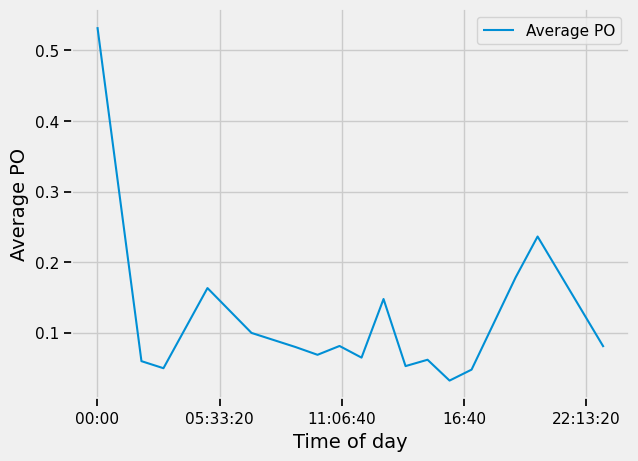

In [10]:
train_df['Hour_avg'] = train_df.Datetime.dt.round('H').dt.time
train_df_by_hour = train_df[['Average PO', 'Hour_avg']].groupby(by='Hour_avg').median()

ax = train_df_by_hour.plot()
ax.set_xlabel('Time of day', fontsize=14)
ax.set_ylabel('Average PO', fontsize=14)


Same for creek outflow only

In [11]:
train_df_creek_outflow = train_df.loc[train_df['Location'] == 'Camp Creek (Outflow)', :]

In [12]:
train_df_creek_outflow

,Location,Temperature (C ),pH,Conductivity (uS/cm),DO mg/L,DO %,Average PO,Time,year,month,day,hour,minutes,Datetime,Hour_avg
12,Camp Creek (Outflow),23.4,7.960,60.3,7.05,82.7,0.060,09:55:00,2019,8,6,9,55,2019-08-06 09:55:00,10:00:00
189,Camp Creek (Outflow),17.0,7.170,78.3,6.69,72.3,0.097,14:48:00,2022,8,6,14,48,2022-08-06 14:48:00,15:00:00
101,Camp Creek (Outflow),0.0,0.000,0.0,0.00,0,0.140,10:20:00,2021,8,23,10,20,2021-08-23 10:20:00,10:00:00
267,Camp Creek (Outflow),15.2,7.360,73.9,10.30,103,0.080,14:12:00,2022,8,11,14,12,2022-08-11 14:12:00,14:00:00
170,Camp Creek (Outflow),15.5,6.330,80.0,9.64,96.5,0.154,05:17:00,2022,8,22,5,17,2022-08-22 05:17:00,05:00:00
307,Camp Creek (Outflow),24.6,8.040,78.3,7.70,91.7,0.037,16:55:00,2022,8,12,16,55,2022-08-12 16:55:00,17:00:00
223,Camp Creek (Outflow),14.6,10.160,132.3,7.32,71.9,0.073,14:57:00,2022,8,9,14,57,2022-08-09 14:57:00,15:00:00
132,Camp Creek (Outflow),16.0,7.210,73.0,8.26,83.8,0.144,11:30:00,2021,8,30,11,30,2021-08-30 11:30:00,12:00:00
235,Camp Creek (Outflow),16.6,6.470,0.0,7.30,78.5,0.077,14:10:00,2022,8,8,14,10,2022-08-08 14:10:00,14:00:00
329,Camp Creek (Outflow),14.6,7.590,71.0,7.15,70.3,0.093,02:43:00,2022,8,15,2,43,2022-08-15 02:43:00,03:00:00


In [13]:
train_df_creek_outflow['Hour_avg'] = train_df.Datetime.dt.round('H').dt.time

C:\Users\mwendwa.kiko\AppData\Local\Temp\ipykernel_4100\1685781571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_creek_outflow['Hour_avg'] = train_df.Datetime.dt.round('H').dt.time


In [14]:
train_df_creek_outflow_grouped = train_df_creek_outflow[['Average PO', 'Hour_avg']].groupby(by='Hour_avg').mean()

In [15]:
train_df_creek_outflow_grouped

,Average PO
Hour_avg,
03:00:00,0.093000
05:00:00,0.154000
09:00:00,0.047000
10:00:00,0.100000
11:00:00,0.058500
12:00:00,0.167667
14:00:00,0.062500
15:00:00,0.080000
17:00:00,0.037000


In [16]:
time_range = [datetime.time(hour=x) for x in range(3, 19, 2)]
time_range

[datetime.time(3, 0),
 datetime.time(5, 0),
 datetime.time(7, 0),
 datetime.time(9, 0),
 datetime.time(11, 0),
 datetime.time(13, 0),
 datetime.time(15, 0),
 datetime.time(17, 0)]

<Figure size 3000x1000 with 0 Axes>

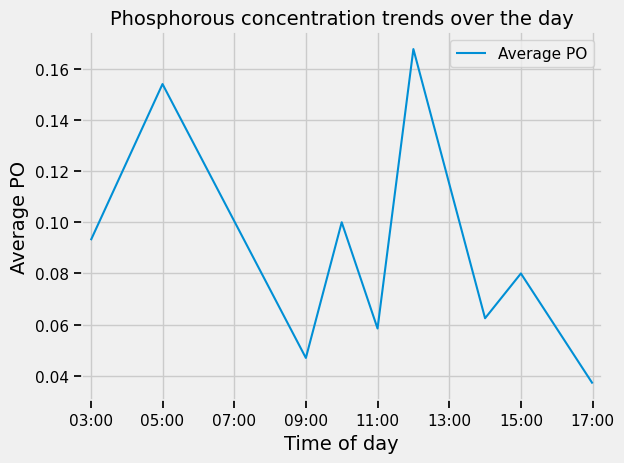

In [17]:
plt.figure(figsize=(30, 10))
ax = train_df_creek_outflow_grouped.plot()
ax.set_xlabel('Time of day', fontsize=14)
ax.set_ylabel('Average PO', fontsize=14)
ax.set_xlim([datetime.time(hour=2, minute=45), datetime.time(hour=17, minute=15)])
ax.set_xticks(time_range)
plt.title('Phosphorous concentration trends over the day', fontsize=14)
plt.tight_layout()
plt.savefig('daily_variation_PO_3.png')
plt.show()


Plotting the daily average PO for the whole year

'Day' + 'Month'

### Initial barplot of DO/location

In [18]:
lake_data.Location = lake_data.Location.str.lower()
lake_data.Location = lake_data.Location.str.strip()
lake_data.Location = lake_data.Location.replace({'camp creek (wier)': 'camp creek (weir)', 'camp creek at weir': 
                            'camp creek (weir)', 'camp creek outflow': 'camp creek (outflow)'})
mask1 = lake_data['Location'].str.contains('well').fillna(False)
well_data = lake_data.loc[mask1, ['Location', 'DO mg/L']]
mask2 = ((lake_data['Location'].str.contains('camp creek').fillna(False))&(~lake_data['Location'].str.contains('gull lake').fillna(False))
                                                                         &(~lake_data['Location'].str.contains('wetland').fillna(False))
                                                                         &(~lake_data['Location'].str.contains('(end)').fillna(False))
                                                                         &(~lake_data['Location'].str.contains('(wetlands)').fillna(False))
                                                                         &(~lake_data['Location'].str.contains(' #6').fillna(False))
                                                                         )
creek_data = lake_data.loc[mask2, ['Location', 'DO mg/L']]
well_data['Location'] = well_data['Location'].replace({'well#3' : 'well #3'})
well_data = well_data.loc[well_data['Location'] != 'well #6']

C:\Users\mwendwa.kiko\AppData\Local\Temp\ipykernel_4100\534396902.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  &(~lake_data['Location'].str.contains('(end)').fillna(False))
C:\Users\mwendwa.kiko\AppData\Local\Temp\ipykernel_4100\534396902.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  &(~lake_data['Location'].str.contains('(wetlands)').fillna(False))


In [19]:
creek_data = creek_data.groupby(by='Location').mean()

In [20]:
well_data = well_data.groupby(by='Location').mean()

In [21]:
well_creek_plotting_data = pd.concat([creek_data, well_data])
well_creek_plotting_data.dropna(inplace=True)

In [22]:
well_creek_plotting_data.index

Index(['camp creek (bridge)', 'camp creek (mid)', 'camp creek (outflow)',
       'camp creek (weir)', 'well #1', 'well #2', 'well #3', 'well #4'],
      dtype='object', name='Location')

<Figure size 3000x2500 with 0 Axes>

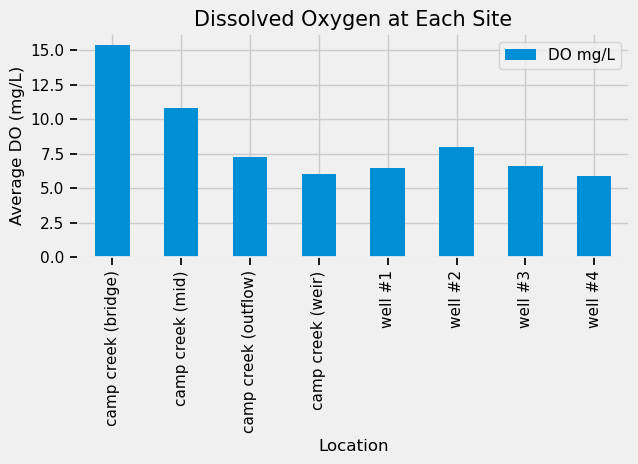

In [23]:
plt.figure(figsize=(30, 25))
ax = well_creek_plotting_data.plot(kind='bar')
ax.set_ylabel('Average DO (mg/L)', fontsize=12)
# ax.tick_params(axis='x', labelrotation=60)
plt.title('Dissolved Oxygen at Each Site', fontsize=15)
plt.tight_layout()
plt.savefig('Average DO per location.png')
plt.show()



In [24]:
no_per_hour = lake_data.hour.value_counts().sort_index().to_frame().reset_index().rename(columns={'index': 'Hour', 'hour': 'no_samples'})
no_per_hour['Hour'] = [f'{h}:00 - {h + 1}:00' for h in no_per_hour['Hour']] 
no_per_hour

,Hour,no_samples
0,0:00 - 1:00,1
1,1:00 - 2:00,9
2,2:00 - 3:00,7
3,3:00 - 4:00,3
4,4:00 - 5:00,1
5,5:00 - 6:00,2
6,7:00 - 8:00,2
7,9:00 - 10:00,17
8,10:00 - 11:00,99
9,11:00 - 12:00,136


In [25]:
lake_data.Location = lake_data.Location.replace({'\([A-Za-z0-9]+\)': ''}, regex=True)
lake_data.Location = lake_data.Location.str.strip()
lake_data.Location = lake_data.Location.str.lower()

## Monthly Evolution

In [26]:
train_df_creek_outflow_2022 = train_df_creek_outflow.loc[train_df_creek_outflow['year'] == 2022]

train_df_creek_outflow_grouped_month_day = train_df_creek_outflow_2022[['Average PO', 'DO mg/L', 'Conductivity (uS/cm)', 'pH', 'month', 'day']].groupby(by=['month', 'day']).mean()
train_df_creek_outflow_grouped_month_day

Average PO  DO mg/L  Conductivity (uS/cm)        pH
month day                                                     
8     6      0.098000    6.440                 79.20  7.333333
      8      0.043333    5.980                 51.00  7.281000
      9      0.081500    7.785                104.05  8.560000
      11     0.176000   11.350                 72.70  7.410000
      12     0.058500    8.325                 74.10  7.740000
      15     0.093000    7.150                 71.00  7.590000
      22     0.154000    9.640                 80.00  6.330000

Before scaling, plot PO alone

In [27]:
PO_evolution = pd.concat([train_df_creek_outflow_grouped_month_day['Average PO']/0.098 * 100, 
                         train_df_creek_outflow_grouped_month_day['Average PO'] - 0.098], axis=1)
PO_evolution

Average PO    Average PO
month day                          
8     6    100.000000 -1.387779e-17
      8     44.217687 -5.466667e-02
      9     83.163265 -1.650000e-02
      11   179.591837  7.800000e-02
      12    59.693878 -3.950000e-02
      15    94.897959 -5.000000e-03
      22   157.142857  5.600000e-02

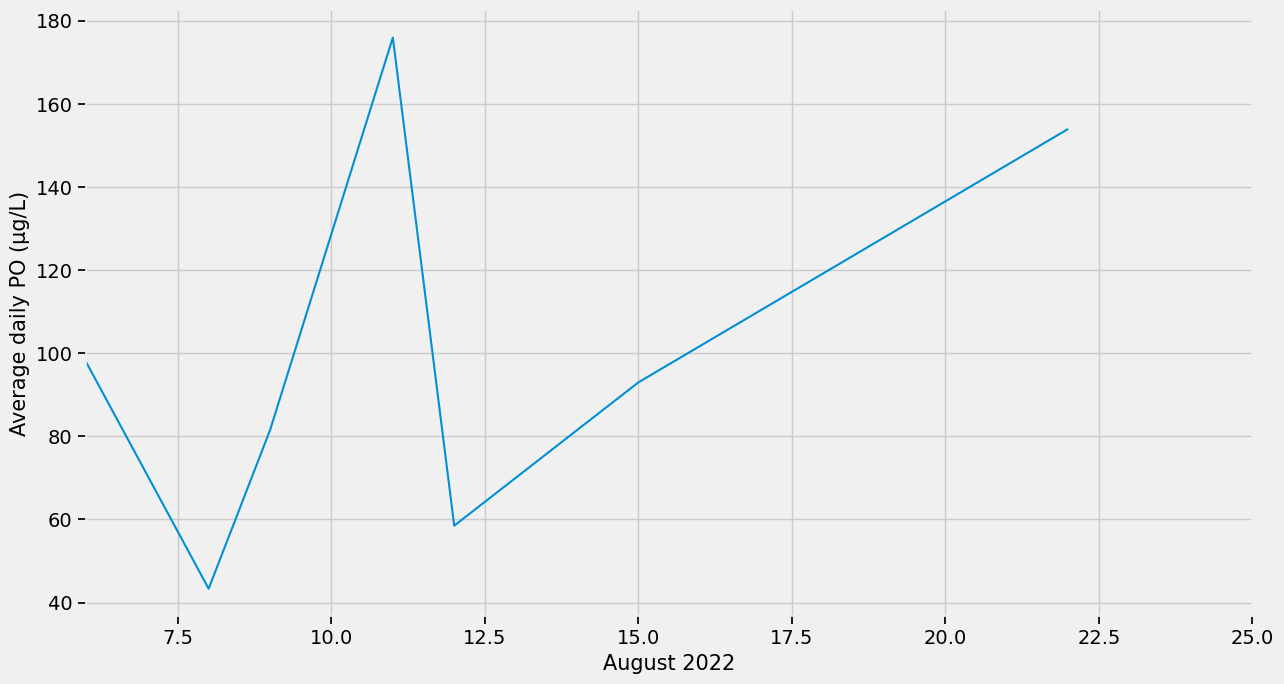

In [28]:
plt.figure(figsize= (13, 7))
dataset = train_df_creek_outflow_grouped_month_day.reset_index()[['Average PO', 'day']]
dataset['Average PO'] *= 1000
ax = sns.lineplot(data=dataset, x='day', y='Average PO')
ax.set_ylabel('Average daily PO (μg/L)', fontsize=15)
ax.set_xlabel('August 2022', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlim([6, 25])
plt.tight_layout()
# plt.savefig('Time spent eutrophied2.png')
plt.show()

Scaling DO, PO

In [29]:
scaler = StandardScaler()
train_df_creek_outflow_grouped_month_day[['Average PO', 'DO mg/L', 'Conductivity (uS/cm)', 'pH']] = scaler.fit_transform(train_df_creek_outflow_grouped_month_day)
train_df_creek_outflow_grouped_month_day

Average PO   DO mg/L  Conductivity (uS/cm)        pH
month day                                                      
8     6     -0.058526 -0.950593              0.219765 -0.212211
      8     -1.280128 -1.214693             -1.721247 -0.297546
      9     -0.427241 -0.178390              1.930196  1.787995
      11     1.684491  1.868379             -0.227631 -0.087198
      12    -0.941208  0.131640             -0.131269  0.450901
      15    -0.170258 -0.542962             -0.344643  0.206310
      22     1.192871  0.886619              0.274829 -1.848250

In [30]:
train_df_creek_outflow_grouped_month_day = train_df_creek_outflow_grouped_month_day[['Average PO', 'DO mg/L']].stack().reset_index().rename(columns={'level_2': 'Variable', 0: 'Value'})

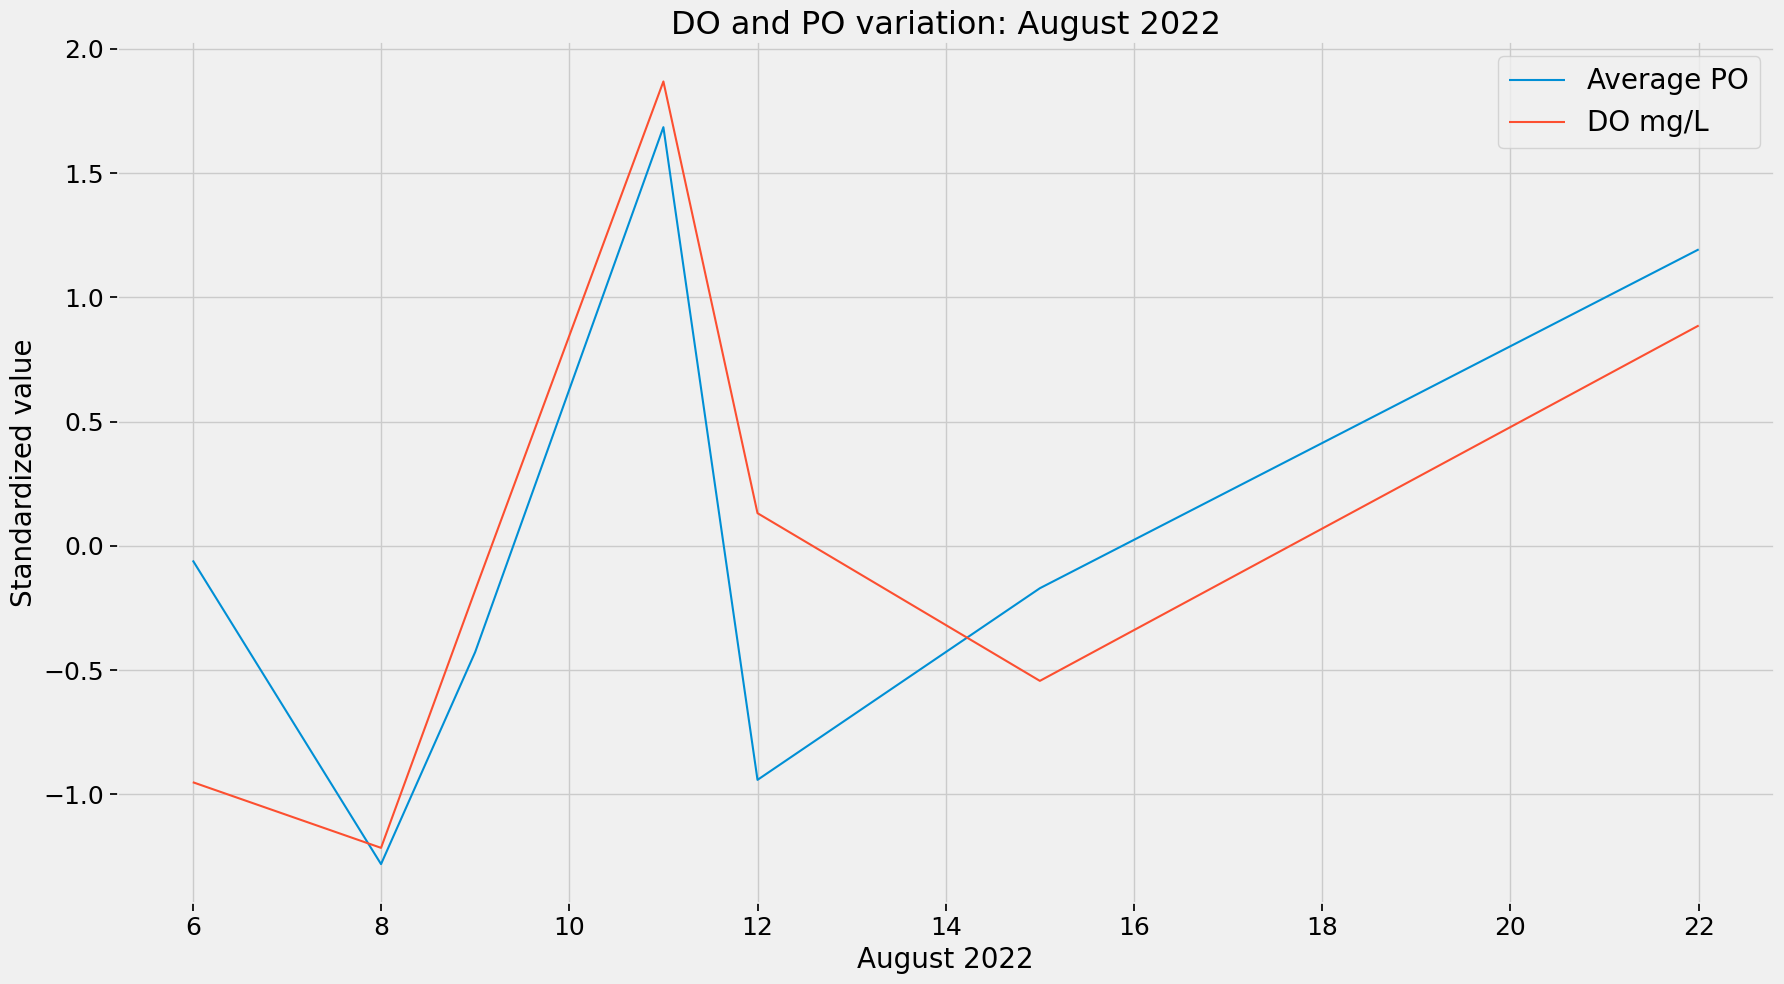

In [31]:
plt.figure(figsize= (18, 10))
ax = sns.lineplot(data=train_df_creek_outflow_grouped_month_day, x='day', y='Value', hue='Variable')
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel('Standardized value', fontsize=20)
ax.set_xlabel('August 2022', fontsize=20)
ax.legend(fontsize=20)
plt.title('DO and PO variation: August 2022', fontsize=23)
plt.tight_layout()
plt.savefig('Variation during August 2022_4.png')
plt.show()


### The same for other sites

In [32]:
train_df_creek_outflow_grouped_month_day

,month,day,Variable,Value
0,8,6,Average PO,-0.058526
1,8,6,DO mg/L,-0.950593
2,8,8,Average PO,-1.280128
3,8,8,DO mg/L,-1.214693
4,8,9,Average PO,-0.427241
5,8,9,DO mg/L,-0.178390
6,8,11,Average PO,1.684491
7,8,11,DO mg/L,1.868379
8,8,12,Average PO,-0.941208
9,8,12,DO mg/L,0.131640
